###### Credit : superdatascience.com

Business case : Predict the net hourly electrical energy output (EP) of the power plant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf

## Data

* Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)
* net hourly electrical energy output (EP)

In [3]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')

In [4]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Preprocessing

##### Missing Values

<Axes: >

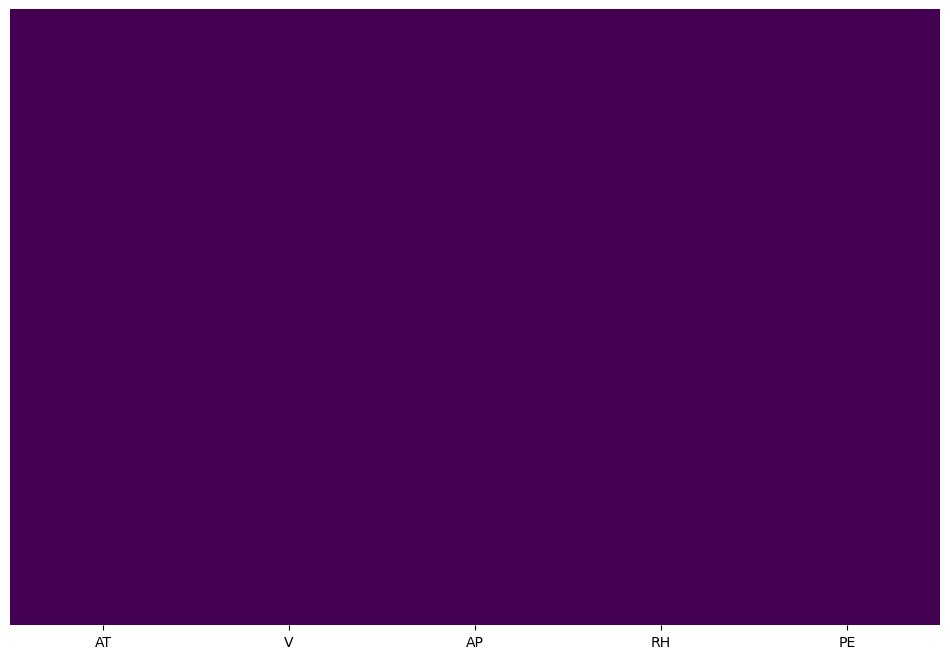

In [6]:
plt.rcParams['figure.figsize'] = 12, 8
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

##### Set Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test =  sc.transform(X_test)

## Artificial Neural Network

##### Model

In [10]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

ann.add(tf.keras.layers.Dense(units = 1))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

##### Training

In [11]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100

240/240 [==============================] - 1s 738us/step - loss: 204845.8438
Epoch 2/100
240/240 [==============================] - 0s 671us/step - loss: 191655.8281
Epoch 3/100
240/240 [==============================] - 0s 662us/step - loss: 147186.8125
Epoch 4/100
240/240 [==============================] - 0s 761us/step - loss: 91038.0547
Epoch 5/100
240/240 [==============================] - 0s 654us/step - loss: 55149.8555
Epoch 6/100
240/240 [==============================] - 0s 653us/step - loss: 31577.8223
Epoch 7/100
240/240 [==============================] - 0s 777us/step - loss: 16956.0234
Epoch 8/100
240/240 [==============================] - 0s 895us/step - loss: 10236.9990
Epoch 9/100
240/240 [==============================] - 0s 727us/step - loss: 7121.8174
Epoch 10/100
240/240 [==============================] - 0s 644us/step - loss: 5277.6006
Epoch 11/100
240/240 [==============================] - 0s 646us/step - loss: 4047.5405
Epoch 12/100
240/240 [=======

240/240 [==============================] - 0s 639us/step - loss: 20.7443
Epoch 94/100
240/240 [==============================] - 0s 643us/step - loss: 20.7326
Epoch 95/100
240/240 [==============================] - 0s 648us/step - loss: 20.9075
Epoch 96/100
240/240 [==============================] - 0s 651us/step - loss: 20.8215
Epoch 97/100
240/240 [==============================] - 0s 649us/step - loss: 20.8013
Epoch 98/100
240/240 [==============================] - 0s 656us/step - loss: 20.8176
Epoch 99/100
240/240 [==============================] - 0s 660us/step - loss: 20.6817
Epoch 100/100
240/240 [==============================] - 0s 650us/step - loss: 20.6903


##### Prediction

In [12]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

60/60 [==============================] - 0s 593us/step
[[431.21 431.23]
 [458.46 460.01]
 [462.82 461.14]
 ...
 [469.35 473.26]
 [441.85 438.  ]
 [461.34 463.28]]


#####  Evaluation

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9351991677049638